In [185]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium
from geopy.distance import geodesic
import pickle
from networkx.exception import NetworkXNoPath
import random

In [2]:
log_books = pd.read_csv("data/logbooks.csv")

/home/kingscollege/PycharmProjects/Network_2/venv/lib64/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
log_books.head()
#Destination - VoyageTo
#Origin - VoyageFrom
#ShipName - ShipName
#ShipType - ShipType
#instland - InstLand
#Nation - Nationality
# date info - Calendar	Year	Month	Day

,RecID,InstAbbr,InstName,InstPlace,InstLand,NumberEntry,NameArchiveSet,ArchivePart,Specification,LogbookIdent,...,CargoMemo,ShipAndRig,ShipAndRigMemo,Biology,BiologyMemo,WarsAndFights,WarsAndFightsMemo,Illustrations,TrivialCorrection,OtherRem
0,108,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 15",...,NaN,0,NaN,0,NaN,0,NaN,0,0,"LA FRAGATA BRETAÑA, DESPUES DE HABER CORRIDO U..."
1,109,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...
2,110,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...
3,111,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...
4,112,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...


In [4]:
log_books["Nationality_clean"] = log_books.Nationality.str.replace(" ","")

In [5]:
print(log_books.InstLand.value_counts())

Nederland         128711
United Kingdom     87838
Spain              54082
France              8949
Sweden               700
Name: InstLand, dtype: int64


In [6]:
log_small = log_books.drop_duplicates(["InstLand","VoyageFrom","VoyageTo","Year"], ignore_index=True).dropna(axis=0,
                                                                                                             subset=["VoyageFrom","VoyageTo"])

In [7]:
print(log_small.InstLand.value_counts())
print(log_small.VoyageFrom.value_counts())
print(log_small.VoyageTo.value_counts())

United Kingdom    1983
Nederland         1968
Spain              459
France             197
Sweden               5
Name: InstLand, dtype: int64
Batavia               233
Spithead              174
Nederland             119
Plymouth               96
CÁDIZ                  96
                     ... 
Princes                 1
STA. CATALINA           1
Marvile Madagascar      1
VERACRUZ.               1
Baaij van Algoa         1
Name: VoyageFrom, Length: 980, dtype: int64
Batavia                                               284
Spithead                                              167
Suriname                                              117
St Helena                                             109
Madras                                                101
                                                     ... 
Nieuwendiep                                             1
Brissel                                                 1
Prinsies                                                1
ISLA

In [8]:
# create a graph for every country and make them unique 
g=nx.from_pandas_edgelist(log_small,source="VoyageFrom", target="VoyageTo")

In [9]:
unique_countries = np.unique(log_small.InstLand)

In [10]:
log_small[log_small.InstLand=="Nederland"]

,RecID,InstAbbr,InstName,InstPlace,InstLand,NumberEntry,NameArchiveSet,ArchivePart,Specification,LogbookIdent,...,ShipAndRig,ShipAndRigMemo,Biology,BiologyMemo,WarsAndFights,WarsAndFightsMemo,Illustrations,TrivialCorrection,OtherRem,Nationality_clean
1314,72066,NAN,Nationaal Archief of the Netherlands,Den Haag,Nederland,1.01.46,177,Eerste Afdeling / Admiraliteitscolleges,2396,ADM_177_2396,...,0,NaN,0,NaN,0,NaN,0,0,NaN,Dutch
1315,72074,NAN,Nationaal Archief of the Netherlands,Den Haag,Nederland,1.04.02,152,VOC,11437,VOC_152_11437,...,1,scheepten de loods af.,0,NaN,0,NaN,0,1,"5 uur: sein anker op.? uur: onder zeil. 10,5 u...",Dutch
1316,72089,KNMI,Koninklijk Nederlands Meteorologisch Instituut,De Bilt,Nederland,NaN,NaN,Extract,L,"Extract L, Reis 1",...,0,NaN,0,NaN,0,NaN,0,0,NaN,Dutch
1317,72185,KNMI,Koninklijk Nederlands Meteorologisch Instituut,De Bilt,Nederland,NaN,NaN,Extract,B,"Extract B, Reis 2",...,0,NaN,0,NaN,0,NaN,0,0,NaN,Dutch
1318,72287,KNMI,Koninklijk Nederlands Meteorologisch Instituut,De Bilt,Nederland,NaN,NaN,Extract,17+,"Extract 17+, Reis 23",...,0,NaN,0,NaN,0,NaN,0,0,NaN,Dutch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,279798,NAN,Nationaal Archief of the Netherlands,Den Haag,Nederland,2.12.03,D23905,MAR,145,MAR_D23905_145,...,0,NaN,0,NaN,0,NaN,0,0,NaN,Dutch
4803,279835,NAN,Nationaal Archief of the Netherlands,Den Haag,Nederland,2.12.03,D23905,MAR,145,MAR_D23905_145,...,0,NaN,0,NaN,0,NaN,0,0,NaN,Dutch
4804,279970,KNMI,Koninklijk Nederlands Meteorologisch Instituut,De Bilt,Nederland,NaN,NaN,Extract,E,"Extract E, reis 07, p.67-86",...,0,NaN,0,NaN,0,NaN,0,0,Ten 8 uur passeerden de Uiterton,Dutch
4805,279972,KNMI,Koninklijk Nederlands Meteorologisch Instituut,De Bilt,Nederland,NaN,NaN,Extract,E,"Extract E, reis 07, p.67-86",...,0,NaN,0,NaN,0,NaN,0,0,NaN,Dutch


In [11]:
layer_dict = {}
for x in unique_countries:
    print(x)
    layer_dict[x] = nx.from_pandas_edgelist(log_small[log_small.InstLand==x],source="VoyageFrom", target="VoyageTo")
    print(layer_dict[x].nodes)

France
['Brest', 'St. Domingue', 'West Indies', 'Coastal', 'Guadeloupe', 'Nantes', 'Rochefort', 'Fort Royal', 'Cap', 'la Barbade', 'Caribean', 'Dominique, cadix, Malagua et retour a Brest', 'Cadix', 'Malagua', 'La Havane', 'Ferrol', 'Martinique', 'La Martinique', 'Basse Terre', 'Nantasken', 'Busque', "Isle d'Aix", 'Louisbourg', 'Québec', 'Quebec', 'Port Louis', 'Cadise', 'Mediteranee', 'Toulon', 'Malaga', 'Marie Galante', 'St Domingue', 'St. Nazaire', "L'isle d'Aix", 'La Guadeloupe', 'Caribe', 'St Croix', 'Cayenne', 'Baltimore', 'Lorient ', 'Portsmouth', 'Philadelphia', 'Havre', 'Saint Pierre', 'Le Havre', 'New York', 'Cherbourg', "L'isle Dieu", 'Isle d´Aix', ' Rochefort', 'Baie de Chibouctou-Rochefort', 'La Carboniere', "Isle D'aix", 'Le Habre', 'Brest-Martinique-Guadeloupe-Brest', 'Martinique-Guadeloupe-Dominique-Sainte Lucie et re', 'Iles St. Pierre, Terre Neuve, Ile Royale et retour', "Ile d'Aix", 'Louisbourg et rtour a Rochefort', 'Louisbourg et retour a Rochefort', "L'isle D'aix"

In [12]:
# find if there are any overlaps in nodes
for x in unique_countries:
    print("x:" + x)
    for y in unique_countries:
        if(x==y):
            continue
        print("y:" + y)
        print(len(set([i.replace(" ","").lower() for i in layer_dict[x].nodes]).intersection(set([i.replace(" ","").lower() for i in layer_dict[y].nodes]))))

x:France
y:Nederland
15
y:Spain
2
y:Sweden
0
y:United Kingdom
14
x:Nederland
y:France
15
y:Spain
18
y:Sweden
2
y:United Kingdom
61
x:Spain
y:France
2
y:Nederland
18
y:Sweden
0
y:United Kingdom
11
x:Sweden
y:France
0
y:Nederland
2
y:Spain
0
y:United Kingdom
2
x:United Kingdom
y:France
14
y:Nederland
61
y:Spain
11
y:Sweden
2


In [17]:
print("It makes sense to do lower case and remove spaces")
for x in unique_countries:
    print("x:" + x)
    for y in unique_countries:
        if(x==y):
            continue
        print("y:" + y)
        print(len(set([i.replace(" ","").lower() for i in layer_dict[x].nodes]).intersection(set([i.replace(" ","").lower() for i in layer_dict[y].nodes]))) - 
              len(set(layer_dict[x].nodes).intersection(set(layer_dict[y].nodes))))

It makes sense to do lower case and remove spaces
x:France
y:Nederland
0
y:Spain
2
y:Sweden
0
y:United Kingdom
1
x:Nederland
y:France
0
y:Spain
16
y:Sweden
0
y:United Kingdom
1
x:Spain
y:France
2
y:Nederland
16
y:Sweden
0
y:United Kingdom
9
x:Sweden
y:France
0
y:Nederland
0
y:Spain
0
y:United Kingdom
0
x:United Kingdom
y:France
1
y:Nederland
1
y:Spain
9
y:Sweden
0


In [18]:
# Now I have networks. UK and Netherlands are most dominating in the dataset,
# probably most overlap.
# How to define interesting ports:
# assumption: 
# H0 all ports are connected 
# (e.g. I can get to any port from any port if I use every nations network)
# H1 Largest port within network is most likely to be an overlap with the other ports
# within degree and across degree overlap
# H2 there is a distinct collection of ports with high degree and many with low degrees
# H3 

In [13]:
# Start with H0:
log_small["VoyageFrom_small"] = log_small.VoyageFrom.str.lower().str.replace(" ","")
log_small["VoyageTo_small"] = log_small.VoyageTo.str.lower().str.replace(" ","")
g_h0=nx.from_pandas_edgelist(log_small,source="VoyageFrom_small", target="VoyageTo_small")

In [14]:
print(nx.is_connected(g_h0))
graphs_h0 = sorted(nx.connected_components(g_h0), key=len, reverse=True)
print(len(graphs_h0[0]))

False
1178


In [15]:
lcc = graphs_h0[0]
#log_small["VoyageFrom_small"].isin(lcc)
for x in graphs_h0:
    print(np.unique(log_small[log_small["VoyageFrom_small"].isin(x) | log_small["VoyageTo_small"].isin(x)].InstLand))
# outcome, there is one large component where everyone is 
# involved and then multiple smaller components where each country is unique

['France' 'Nederland' 'Spain' 'Sweden' 'United Kingdom']
['Spain']
['Nederland']
['United Kingdom']
['Spain']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['France']
['United Kingdom']
['Spain']
['Spain']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['Nederland']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['Nederland']
['Nederland']
['Nederland']
['Nederland']
['United Kingdom']
['Spain']
['Spain']
['United Kingdom']
['Spain']
['Nederland']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['Nederland']
['United Kingdom']
['Spain']
['Spain']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['France']
['France']
['France']
['France']
['Spain']
['Spain']
['Nederland']
['Unit

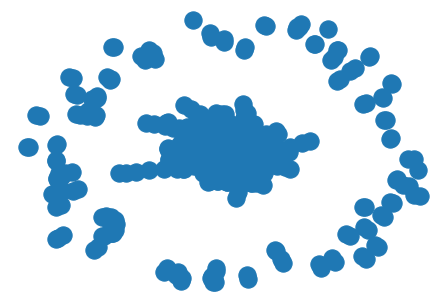

In [16]:
# find visualization 
# idea 1: plot it all, colour by country and overlap is its own special colour (e.g. collapse everything into 1D)
# idea 2: every country unique but draw connection between the shared nodes
# start with idea 1:
%matplotlib inline
nx.draw(g_h0)

In [17]:
# to do this add labels to every node, which is either - one country, two countries, three countries or more
node_list =g_h0.nodes
node_targeted = {}
for x in node_list:
    countries = np.unique(log_small[(log_small["VoyageFrom_small"]==x) | (log_small["VoyageTo_small"]==x)].InstLand)
    node_targeted[x] = {"countries":countries, "numb": len(countries)}
nx.set_node_attributes(g_h0,node_targeted)

In [18]:
nodes = g_h0.nodes(data=True)
print(list(nodes)[0][1]["numb"])

1


In [19]:
node_color = []

# for each node in the graph
for node in g_h0.nodes(data=True):
    if(node[1]["numb"]>1):
        node_color.append("black")
        continue
    if(node[1]["countries"][0] =="Spain"):
        node_color.append("#cccccc")
        continue
    if(node[1]["countries"][0] =="United Kingdom"):
        node_color.append("#00247d")
        continue
    if(node[1]["countries"][0] =="France"):
        node_color.append("#EF4135")
        continue
    if(node[1]["countries"][0] =="Nederland"):
        node_color.append("#FF9B00")
        continue
    if(node[1]["countries"][0] =="Sweden"):
        node_color.append("#FFCD00")
        continue 

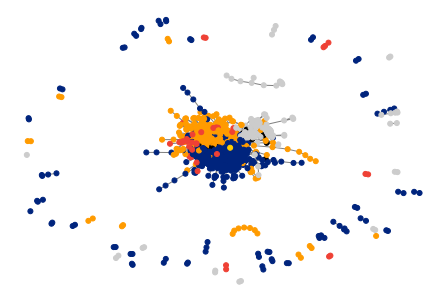

In [20]:
nx.draw_spring(g_h0, node_color=node_color, node_size = 25, edge_color="grey")

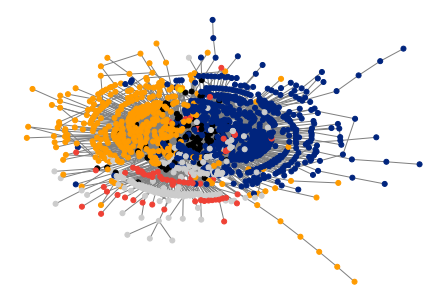

In [21]:
nx.draw_kamada_kawai(g_h0, node_color=node_color, node_size = 25, edge_color="grey")

In [28]:
geolocator = Nominatim(user_agent="NDA")
notFound = 0
locations_found = {}
count = 0

def do_request(loc, value):
    try:
        return loc.geocode(value,exactly_one=False)
    except GeocoderTimedOut:
        return do_request(loc,value)
        

for x in np.unique(log_small["VoyageFrom"].append(log_small["VoyageTo"])):
    time.sleep(1)
    count+= 1
    print(count)
    location = do_request(geolocator, x)
    if(location==None):
        notFound += 1
        continue
    locations_found[x.replace(" ","").lower()] = location[0]
print(notFound)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [33]:
print(len(locations_found.keys()))

897


In [23]:
import pickle
#pickle.dump(locations_found,open( "locs.p", "wb" ))

In [26]:
locations_found = pickle.load( open( "locs.p", "rb" ))
print(len(locations_found.keys()))

897


In [149]:
m = folium.Map([0,0],zoom_start=2)

for x in locations_found.keys():
     folium.CircleMarker((locations_found[x].latitude,locations_found[x].longitude),
                         radius= 1).add_to(m)
m

In [156]:
import json

with open('data/map.geojson') as f:
    seapoints = json.load(f)["features"]

In [157]:
print(seapoints)

[{'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [70.48828125, -1.0546279422758742]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [156.4453125, -10.833305983642491]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-0.3515625, 50.233151832472245]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-5.2734375, 49.61070993807422]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-19.335937499999996, 48.45835188280866]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-28.4765625, 49.61070993807422]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-37.265625, 51.83577752045248]}}, {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-45.703125, 51.39920565355378]}}, {'type': 'Feature', 'properties': {}, 

In [158]:
coords = list()

for x in seapoints:
    coords.append([x["geometry"]["coordinates"][1],x["geometry"]["coordinates"][0]])

In [159]:
print(coords)

[[-1.0546279422758742, 70.48828125], [-10.833305983642491, 156.4453125], [50.233151832472245, -0.3515625], [49.61070993807422, -5.2734375], [48.45835188280866, -19.335937499999996], [49.61070993807422, -28.4765625], [51.83577752045248, -37.265625], [51.39920565355378, -45.703125], [47.754097979680026, -53.4375], [44.08758502824516, -64.6875], [40.17887331434696, -69.9609375], [35.746512259918504, -71.3671875], [30.751277776257812, -75.234375], [27.371767300523047, -72.0703125], [22.268764039073968, -61.87499999999999], [15.623036831528264, -51.67968749999999], [3.8642546157214084, -44.29687499999999], [-7.362466865535738, -33.046875], [-20.632784250388013, -35.5078125], [7.710991655433217, -29.8828125], [7.013667927566642, -20.0390625], [39.90973623453719, -10.8984375], [32.84267363195431, -12.65625], [29.22889003019423, -16.171875], [22.59372606392931, -21.4453125], [0.7031073524364909, -7.734374999999999], [-4.915832801313164, 4.21875], [-20.632784250388013, 8.4375], [-10.48781188205

In [162]:
edgelist = list()
for x in range(0,len(coords)):
    dist = list()
    index = list()

    for y in range(0,len(coords)):
        if(x==y):
            continue
        if(coords[y][1]< -150 and coords[x][1]> 150 or coords[x][1]< -150 and coords[y][1]> 150):
            #print(coords[x])
            #print(coords[y])
            dist.append(9999999999)
        else:
            dist.append(geodesic(coords[x], coords[y]).kilometers)
        index.append(y)
        #sorted_idxs = np.argsort(dist)
        #index = index[sorted_idxs]
        #dist = dist[sorted_idxs]
        
        #for i in range(0,3):
        #    print(index[i])
    dist, index = (list(t) for t in zip(*sorted(zip(dist, index))))   
    
    edgelist.append((x,index[0],dist[0]))
    edgelist.append((x,index[1],dist[1]))
    #edgelist.append((x,index[2]))
    #print(edgelist)


In [ ]:
# now I can create an additional network
router_network = nx.Graph()
router_network.add_weighted_edges_from(edgelist,weigh="dist")

def return_colour_marker(node):
    if(node["numb"]>1):
        return("black")
    if(node["countries"][0] =="Spain"):
        return("#cccccc")
    if(node["countries"][0] =="United Kingdom"):
        return("#00247d")
    if(node["countries"][0] =="France"):
        return("#EF4135")
    if(node["countries"][0] =="Nederland"):
        return("#FF9B00")
    if(node["countries"][0] =="Sweden"):
        return("#FFCD00")
def return_edge_colour(node1, node2):
    intersec_country = set(node1["countries"]).intersection(set(node2["countries"]))
    if(len(intersec_country)>1):
        return("black")
    if("Spain" in intersec_country ):
        return("#cccccc")
    if( "United Kingdom" in intersec_country):
        return("#00247d")
    if("France" in intersec_country):
        return("#EF4135")
    if("Nederland" in intersec_country ):
        return("#FF9B00")
    if("Sweden" in intersec_country):
        return("#FFCD00")

In [ ]:
# finding the closest two coordinates from my harbours to the lets me find the shortest path betwen them
m = folium.Map([0,0],zoom_start=2)

for x in locations_found.keys():
    col = return_colour_marker(node_targeted[x])
    folium.CircleMarker((locations_found[x].latitude,locations_found[x].longitude),
                        radius = 2,color=col).add_to(m)
def find_closest_index(coord,coords):
    dist = list()
    index = list()
    for y in range(0,len(coords)):
        dist.append(geodesic(coord, coords[y]).kilometers)
        index.append(y)
    dist, index = (list(t) for t in zip(*sorted(zip(dist, index))))
    return(index[0])
# go through every single edge in my original graph, 
# check if I have a location for that village
# if no, next pair
# if yes: find nearest point on map
#         get indices, calculate shortest path, 
#         from order, get coordinates, append my villages front and back and then plot on map
k = locations_found.keys()
locations = list(g_h0.edges())
e = g_h0.edges()
e=random.sample(e, len(e))
for x in e:
    if(x[0] in k and x[1] in k):
        first_coords = (locations_found[x[0]].latitude,locations_found[x[0]].longitude)
        second_coords = (locations_found[x[1]].latitude,locations_found[x[1]].longitude)
        first_index = find_closest_index(first_coords, coords)
        second_index = find_closest_index(second_coords, coords)
        try:
            path = nx.shortest_path(router_network,first_index,second_index, weight="dist")
        except NetworkXNoPath:
            continue
        coords_path = [(coords[i][0]+np.random.normal(0,1),coords[i][1]+np.random.normal(0,1)) for i in path]
        coords_path.insert(0,first_coords)
        coords_path.insert(len(coords_path),second_coords)
        #folium.PolyLine([first_coords,second_coords], color="green", weight=.5, opacity=0.5).add_to(m)
        col =  return_edge_colour(node_targeted[x[0]], node_targeted[x[1]])
        folium.PolyLine(coords_path, color=col, weight=.5, opacity=0.3).add_to(m)
m

In [ ]:
m.save('map.html')

In [ ]:
def find_closest_index(coord,coords):
    dist = list()
    index = list()
    for y in range(0,len(coords)):
        if(x==y):
            continue
        dist.append(geodesic(coord, coords[y]).kilometers)
        index.append(y)
        #sorted_idxs = np.argsort(dist)
        #index = index[sorted_idxs]
        #dist = dist[sorted_idxs]
        
        #for i in range(0,3):
        #    print(index[i])
    dist, index = (list(t) for t in zip(*sorted(zip(dist, index))))
    return(index[0])
first = (21.5381431, -105.18387744346927)
second = (37.173649499999996, -3.5860481687153447)
m = folium.Map([0,0],zoom_start=2)

i = find_closest_index(first, coords)
j = find_closest_index(second, coords)
path = nx.shortest_path(router_network,i,j)
print(path)
coords_path = [coords[i] for i in path]
print(coords_path)
coords_path.insert(0,first)
coords_path.insert(len(coords_path),second)

folium.PolyLine(coords_path, color="green", weight=2.5, opacity=1).add_to(m)
m

In [179]:
def find_closest_index(coord,coords):
    dist = list()
    index = list()
    for y in range(0,len(coords)):
        if(x==y):
            continue
        dist.append(geodesic(coord, coords[y]).kilometers)
        index.append(y)
        #sorted_idxs = np.argsort(dist)
        #index = index[sorted_idxs]
        #dist = dist[sorted_idxs]
        
        #for i in range(0,3):
        #    print(index[i])
    dist, index = (list(t) for t in zip(*sorted(zip(dist, index))))
    return(index[0])
first = (21.5381431, -105.18387744346927)
second = (37.173649499999996, -3.5860481687153447)
m = folium.Map([0,0],zoom_start=2)

i = find_closest_index(first, coords)
j = find_closest_index(second, coords)
path = nx.shortest_path(router_network,i,j)
print(path)
coords_path = [coords[i] for i in path]
print(coords_path)
coords_path.insert(0,first)
coords_path.insert(len(coords_path),second)

folium.PolyLine(coords_path, color="green", weight=2.5, opacity=1).add_to(m)
m

In [191]:
# finding the closest two coordinates from my harbours to the lets me find the shortest path betwen them
m = folium.Map([0,0],zoom_start=2)

for x in locations_found.keys():
    col = return_colour_marker(node_targeted[x])
    folium.CircleMarker((locations_found[x].latitude,locations_found[x].longitude),
                        radius = 2,color=col).add_to(m)
def find_closest_index(coord,coords):
    dist = list()
    index = list()
    for y in range(0,len(coords)):
        dist.append(geodesic(coord, coords[y]).kilometers)
        index.append(y)
    dist, index = (list(t) for t in zip(*sorted(zip(dist, index))))
    return(index[0])
# go through every single edge in my original graph, 
# check if I have a location for that village
# if no, next pair
# if yes: find nearest point on map
#         get indices, calculate shortest path, 
#         from order, get coordinates, append my villages front and back and then plot on map
k = locations_found.keys()
locations = list(g_h0.edges())
e = g_h0.edges()
e=random.sample(e, len(e))
for x in e:
    if(x[0] in k and x[1] in k):
        first_coords = (locations_found[x[0]].latitude,locations_found[x[0]].longitude)
        second_coords = (locations_found[x[1]].latitude,locations_found[x[1]].longitude)
        first_index = find_closest_index(first_coords, coords)
        second_index = find_closest_index(second_coords, coords)
        try:
            path = nx.shortest_path(router_network,first_index,second_index, weight="dist")
        except NetworkXNoPath:
            continue
        coords_path = [(coords[i][0]+np.random.normal(0,1),coords[i][1]+np.random.normal(0,1)) for i in path]
        coords_path.insert(0,first_coords)
        coords_path.insert(len(coords_path),second_coords)
        #folium.PolyLine([first_coords,second_coords], color="green", weight=.5, opacity=0.5).add_to(m)
        col =  return_edge_colour(node_targeted[x[0]], node_targeted[x[1]])
        folium.PolyLine(coords_path, color=col, weight=.5, opacity=0.3).add_to(m)
m

In [192]:
m.save('map.html')

In [87]:
def find_closest_index(coord,coords):
    dist = list()
    index = list()
    for y in range(0,len(coords)):
        if(x==y):
            continue
        dist.append(geodesic(coord, coords[y]).kilometers)
        index.append(y)
        #sorted_idxs = np.argsort(dist)
        #index = index[sorted_idxs]
        #dist = dist[sorted_idxs]
        
        #for i in range(0,3):
        #    print(index[i])
    dist, index = (list(t) for t in zip(*sorted(zip(dist, index))))
    return(index[0])
first = (21.5381431, -105.18387744346927)
second = (37.173649499999996, -3.5860481687153447)
m = folium.Map([0,0],zoom_start=2)

i = find_closest_index(first, coords)
j = find_closest_index(second, coords)
path = nx.shortest_path(router_network,i,j)
print(path)
coords_path = [coords[i] for i in path]
print(coords_path)
coords_path.insert(0,first)
coords_path.insert(len(coords_path),second)

folium.PolyLine(coords_path, color="green", weight=2.5, opacity=1).add_to(m)
m

[89, 88, 87, 86, 85, 84, 82, 80, 77, 76, 75, 73, 16, 15, 17, 18, 22, 20, 19]
[[17.644022027872726, -111.09374999999999], [9.102096738726456, -100.8984375], [1.0546279422758869, -88.9453125], [-6.315298538330033, -82.265625], [-15.961329081596647, -82.265625], [-24.20688962239801, -74.53125], [-37.43997405227057, -73.828125], [-49.15296965617039, -78.046875], [-49.38237278700955, -61.52343749999999], [-44.59046718130883, -55.8984375], [-38.272688535980954, -50.2734375], [-29.84064389983441, -41.484375], [-20.632784250388013, -35.5078125], [-7.362466865535738, -33.046875], [7.710991655433217, -29.8828125], [7.013667927566642, -20.0390625], [22.59372606392931, -21.4453125], [32.84267363195431, -12.65625], [39.90973623453719, -10.8984375]]
